# Setup inicial

In [75]:
import pandas as pd
import janitor
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [6]:
df = pd.read_csv("twitter_data/exploration_dataset.csv", index_col=0)

In [7]:
df.head(10)

,param_defaults,contributors,coordinates,created_at,current_user_retweet,favorite_count,favorited,full_text,geo,hashtags,...,urls,user,user_mentions,withheld_copyright,withheld_in_countries,withheld_scope,tweet_mode,_json,tweet_id,label
0,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:48:33 +0000 2015,NaN,2.0,False,NaN,NaN,[Hashtag(Text='MKR')],...,[],"{""created_at"": ""Thu Jul 03 11:27:16 +0000 2014...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 09:48:33 +0000 2015...,5.723327e+17,racism
1,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4.0,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,[],"{""created_at"": ""Sun Jan 31 11:35:37 +0000 2010...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,5.723415e+17,racism
2,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4.0,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,[],"{""created_at"": ""Sun Jan 31 11:35:37 +0000 2010...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,5.723415e+17,none
3,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4.0,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,[],"{""created_at"": ""Sun Jan 31 11:35:37 +0000 2010...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,5.723415e+17,racism
4,"{'contributors': None, 'coordinates': None, 'c...",NaN,"{'type': 'Point', 'coordinates': [153.37975174...",Mon Mar 02 10:23:41 +0000 2015,NaN,4.0,False,NaN,"{'type': 'Point', 'coordinates': [-28.07334137...",[Hashtag(Text='mkr')],...,[],"{""created_at"": ""Sun Jan 31 11:35:37 +0000 2010...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:23:41 +0000 2015...,5.723415e+17,none
5,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2.0,False,NaN,NaN,[Hashtag(Text='MKR')],...,[],"{""created_at"": ""Fri May 08 11:45:45 +0000 2009...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,5.723405e+17,racism
6,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2.0,False,NaN,NaN,[Hashtag(Text='MKR')],...,[],"{""created_at"": ""Fri May 08 11:45:45 +0000 2009...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,5.723405e+17,none
7,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2.0,False,NaN,NaN,[Hashtag(Text='MKR')],...,[],"{""created_at"": ""Fri May 08 11:45:45 +0000 2009...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,5.723405e+17,racism
8,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 10:19:37 +0000 2015,NaN,2.0,False,NaN,NaN,[Hashtag(Text='MKR')],...,[],"{""created_at"": ""Fri May 08 11:45:45 +0000 2009...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 10:19:37 +0000 2015...,5.723405e+17,none
9,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Mon Mar 02 09:56:43 +0000 2015,NaN,0.0,False,NaN,NaN,[Hashtag(Text='MKR')],...,[],"{""created_at"": ""Wed Jun 25 10:30:25 +0000 2014...",[],NaN,NaN,NaN,compatibility,{'created_at': 'Mon Mar 02 09:56:43 +0000 2015...,5.723347e+17,racism


# Explorando dados
Nesta seção o objetivo é tentar entender o que cada variável/coluna representa de informação e se ela é útil para nós ou não.

Felipe Bormann: A principal coluna com certeza é a coluna "text", apesar de possuir alguns tweets repetidos, o que infelizmente reduz nossa amostra de 10777 tweets para 10650. Eu ainda não chequei o que faz os tweets serem diferentes em si mas os removi por preocaução no primeiro momento.

In [9]:
df["text"]

0        These girls are the equivalent of the irritati...
1        Drasko they didn't cook half a bird you idiot ...
2        Drasko they didn't cook half a bird you idiot ...
3        Drasko they didn't cook half a bird you idiot ...
4        Drasko they didn't cook half a bird you idiot ...
                               ...                        
10773    Ok, so #gameloading was awesome and I hope I c...
10774                     @informationchef @dannyo152 ❤️❤️
10775                                 @BenKuchera ❤️❤️❤️❤️
10776        If I ever do get scared, you'll never know. 😘
10777                      "@panelrific: Let's go 🐧🐧🐧🐧🐧🐧😃"
Name: text, Length: 10780, dtype: object

In [11]:
df["text"].drop_duplicates().size

10650

In [12]:
df.columns

Index(['param_defaults', 'contributors', 'coordinates', 'created_at',
       'current_user_retweet', 'favorite_count', 'favorited', 'full_text',
       'geo', 'hashtags', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'location',
       'media', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'scopes', 'source', 'text',
       'truncated', 'urls', 'user', 'user_mentions', 'withheld_copyright',
       'withheld_in_countries', 'withheld_scope', 'tweet_mode', '_json',
       'tweet_id', 'label'],
      dtype='object')

Felipe Bormann: Duas colunas que eu acho que podem gerar features interessantes é saber se aquele tweet foi em respostas à um usuário ou algum tweet específico. (eu ainda não sei a diferença entre os dois campos mas eles possuem quantidades diferentes, como mostrado abaixo).

In [16]:
df["in_reply_to_status_id"].notnull().sum()

3936

In [17]:
df["in_reply_to_user_id"].notnull().sum()

4083

Analisando a distribuição de usuários.
Limpeza: três usuários são nulos, estes nós vamos remover da base também.

In [36]:
import json
import numpy as np

In [40]:
df[df["user"].isnull()]

,param_defaults,contributors,coordinates,created_at,current_user_retweet,favorite_count,favorited,full_text,geo,hashtags,...,urls,user,user_mentions,withheld_copyright,withheld_in_countries,withheld_scope,tweet_mode,_json,tweet_id,label
1304,"{'contributors': None, 'coordinates': None, 'c...",NaN,NaN,Wed Feb 18 04:54:22 +0000 2015,NaN,0.0,False,NaN,NaN,"[Hashtag(Text='feminists'), Hashtag(Text='yesa...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#yesallmen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
@MT8_9 http://t.co/QHo6dhumjc,False,[],"{""created_at"": ""Fri Aug 22 23:28:35 +0000 2014...","[User(ID=2925672059, ScreenName=Lizzethismetal...",NaN,NaN,NaN,compatibility,{'created_at': 'Wed Feb 18 04:54:22 +0000 2015...,567909969783169024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# removendo os usuários nulos da base
df = df[~df["user"].isnull()]

In [43]:
df["user_id"] = df["user"].apply(lambda user_data: json.loads(user_data)["id"] if user_data != np.nan  else None)

Um fato importante do dataset, é que só temos 1561 usuários, ou seja, em média 4 tweets por usuário. Mas vou checar a distribuição de tweets por cada um.

In [47]:
df["user_id"].unique().size

1561

In [93]:
# tweet_id aqui poderia ficar com um nome melhor, como tweet_count
amount_of_tweet_df = df.groupby("user_id").count()["tweet_id"].reset_index().groupby("tweet_id").count().reset_index()
amount_of_tweet_df = amount_of_tweet_df.rename(columns={"tweet_id": "tweet_amount", "user_id": "user_count"})
amount_of_tweet_df.head(5)

,tweet_amount,user_count
0,1,965
1,2,250
2,3,92
3,4,71
4,5,43


Só um usuário possui **3746 tweets**!

In [94]:
amount_of_tweet_df["tweet_amount"].max()

3746

In [95]:
amount_of_tweet_df.head(50)

,tweet_amount,user_count
0,1,965
1,2,250
2,3,92
3,4,71
4,5,43
5,6,17
6,7,19
7,8,15
8,9,11
9,10,13


In [88]:
z_scores = zscore(amount_of_tweet_df[["tweet_amount"]])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 0.5).all(axis=1)
#new_df = df[filtered_entries]

In [90]:
amount_of_tweet_df = amount_of_tweet_df[filtered_entries]

Um grande quantidade de usuários só tweetou 1x, isso é bom, porque ai tem um bom sample de pessoas diferentes, contudo, essa concentração em um usuário só é bem complicado. Vou checar se há uma grande quantidade de elementos da label positiva neste usuário.

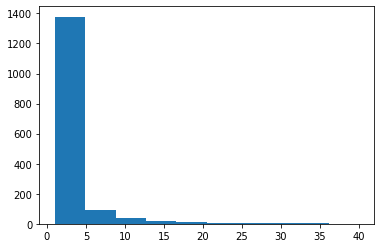

In [91]:
plt.hist(amount_of_tweet_df["tweet_amount"], 10, weights=amount_of_tweet_df["user_count"])
plt.show()

In [33]:
json.loads(df["user"][0])["id"]

2601524623

# criando novas features